In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=c7f75abdf28c2962a80c77b20f699eb448ef689dafbb97662d77e16ee75a65de
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [10]:
import pandas as pd

file_path = '/content/sample_data/diabetes.csv'
df1 = pd.read_csv(file_path)

In [11]:
df1.info()
#df1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
#checking any null values in dataset
print(df1.isnull().sum())


 #df11.head(20)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.

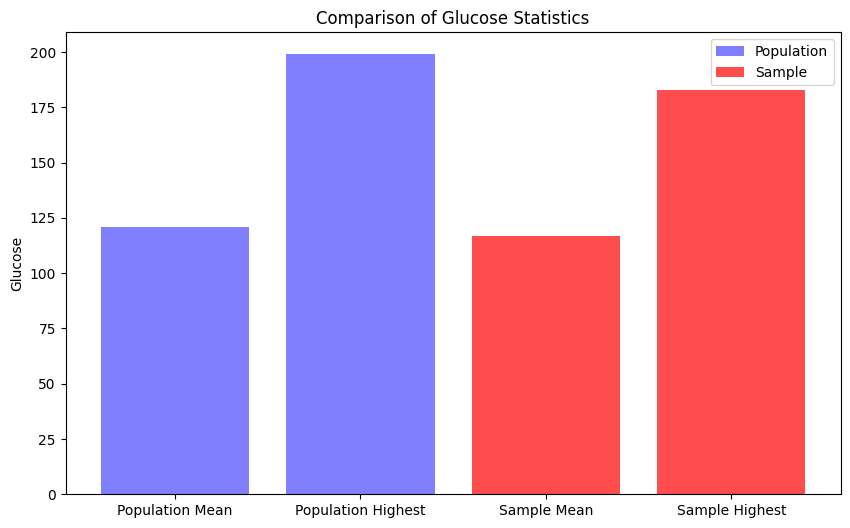

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Setting seed for reproducibility
np.random.seed(42)


# Take a random sample of 25 observations
sample = df1.sample(n=25)

# Calculating mean and highest Glucose values for the sample
sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()

# Calculating mean and highest Glucose values for the Population
population_mean_glucose = df1['Glucose'].mean()
population_highest_glucose = df1['Glucose'].max()

# Plotting
plt.figure(figsize=(10, 6))


plt.bar(['Population Mean', 'Population Highest'], [population_mean_glucose, population_highest_glucose], color='blue', alpha=0.5, label='Population')

plt.bar(['Sample Mean', 'Sample Highest'], [sample_mean_glucose, sample_highest_glucose], color='red', alpha=0.7, label='Sample')

plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose')
plt.legend()
plt.show()


Ans:first we set a seed for reproducibility and then taken sample of 20 random observations then calculated mean and highest glucose values for sample and population and then ploted the results.

After seeing results,i can say that mean and highest glucose values of population are slightly greater then the sample.

b) Find the 98th percentile of BMI of your sample and the population and compare the results using charts.

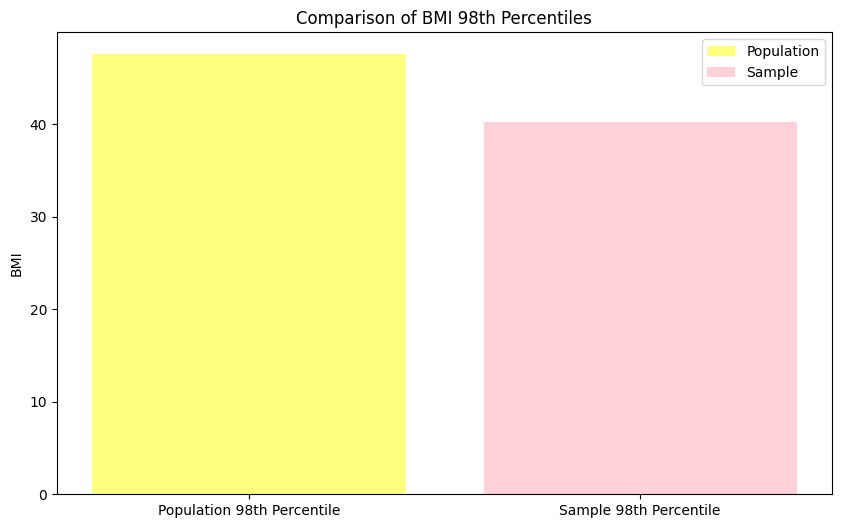

In [14]:
# Setting seed for reproducibility
np.random.seed(42)


# Taking a random sample of 25 observations
sample = df1.sample(n=25)

# Calculating 98th percentile of BMI for the sample
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)

# Calculating 98th percentile of BMI for the population
population_98th_percentile_bmi = np.percentile(df1['BMI'], 98)

# Plotting
plt.figure(figsize=(10, 6))


plt.bar('Population 98th Percentile', population_98th_percentile_bmi, color='yellow', alpha=0.5, label='Population')


plt.bar('Sample 98th Percentile', sample_98th_percentile_bmi, color='pink', alpha=0.7, label='Sample')

plt.title('Comparison of BMI 98th Percentiles')
plt.ylabel('BMI')
plt.legend()
plt.show()


Ans:first we set a seed for reproducibility and then taken sample of 25 random observations then calculated 98th percentile of BMI of your sample and the population and then ploted the results.

After seeing results,i can say that 98th percentile of BMI of population are greater then the sample.

c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings.  

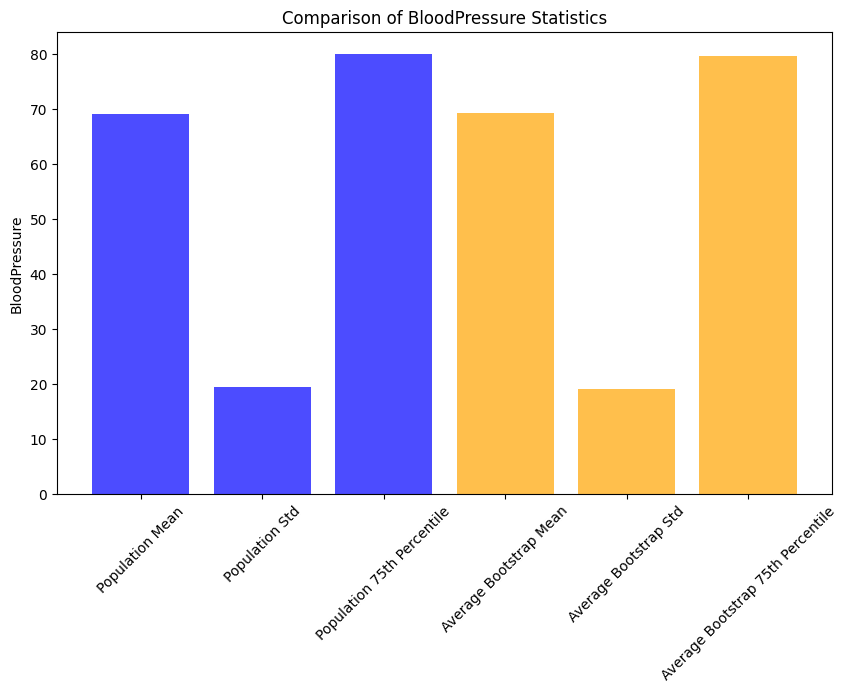

In [15]:
# Setting seed for reproducibility
np.random.seed(42)

#calculating mean,standard deviation and percentile of blood pressure on population
population_mean_bp = df1['BloodPressure'].mean()
population_std_bp = df1['BloodPressure'].std()
population_percentile_bp = np.percentile(df1['BloodPressure'], 75)

# Generate 500 bootstrap samples
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

#creating 500 samples with each one with 150 observations
for _ in range(500):
    # generating sample with 150 observations
    bootstrap_sample = df1['BloodPressure'].sample(n=150, replace=True)
    # Calculating mean, std, and percentile of each sample
    bootstrap_means.append(bootstrap_sample.mean())
    bootstrap_stds.append(bootstrap_sample.std())
    bootstrap_percentiles.append(np.percentile(bootstrap_sample, 75))

# Calculating average for mean, std, and percentile on  bootstrap samples
avg_bootstrap_mean_bp = np.mean(bootstrap_means)
avg_bootstrap_std_bp = np.mean(bootstrap_stds)
avg_bootstrap_percentile_bp = np.mean(bootstrap_percentiles)

# Plotting
labels = ['Population Mean', 'Population Std', 'Population 75th Percentile',
          'Average Bootstrap Mean', 'Average Bootstrap Std', 'Average Bootstrap 75th Percentile']
values = [population_mean_bp, population_std_bp, population_percentile_bp,
          avg_bootstrap_mean_bp, avg_bootstrap_std_bp, avg_bootstrap_percentile_bp]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'blue', 'blue', 'orange', 'orange', 'orange'], alpha=0.7)
plt.title('Comparison of BloodPressure Statistics')
plt.ylabel('BloodPressure')
plt.xticks(rotation=45)
plt.show()

Ans:first we set a seed for reproducibility and then calculated mean,standard deviation and percentile of blood pressure on population and then created 500 bootstraped samples with each one with 150 observations then calculated mean,standard deviation and percentile of blood pressure on each sample then calculated the average of mean,standard deviation and percentile of blood pressure on 500  bootstraped samples then ploted the results.

after seeing the results,i can say that mean,standard deviation and percentile of blood pressure on population are almost similar to the average of mean,standard deviation and percentile of blood pressure of the bootstraped samples.